In [5]:
import pandas as pd
import numpy as np
import dask
import dask.bag as db


In [6]:
from dask_ml.preprocessing import LabelEncoder
from dask_ml.model_selection import train_test_split

ModuleNotFoundError: No module named 'dask_ml'

In [7]:
import math
import json
import os
import sklearn
import requests
import librosa

In [8]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ds340/total.csv'

total = pd.read_csv(file_path)

Mounted at /content/drive


In [9]:
folder_path = '/content/drive/MyDrive/ds340/sampled_files'
sampled_df = pd.read_csv('/content/drive/My Drive/ds340/sampled_df.csv')
sampled_files = os.listdir(folder_path)

track_ids = [os.path.splitext(filename)[0] for filename in sampled_files]

filtered_df = sampled_df[sampled_df['track_id'].isin(track_ids)]

filtered_df

,Unnamed: 0.1,Unnamed: 0,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,url
0,259,259,527,0wFSrH6x1iQOdUljUueAcd,Blame Jones,Acoustic Versions,Dusk Till Dawn - Acoustic,46,167616,False,...,1,0.0511,0.8640,0.000000,0.112,0.2900,126.341,3,acoustic,https://p.scdn.co/mp3-preview/7738fabefe74b51c...
1,658,658,1124,4vNGuGIIzh6soeBTw8hjfq,Boyce Avenue;Alex Goot,"Cover Sessions, Vol. 2",A Thousand Miles,43,244173,False,...,1,0.0295,0.5170,0.000003,0.105,0.2570,95.036,4,acoustic,https://p.scdn.co/mp3-preview/5dd939fe50fed48b...
2,77,77,207,5pq4v03P5PxMcnCagg4S3Z,Boyce Avenue,"Cover Sessions, Vol. 4",In Case You Didn’t Know,60,225165,False,...,1,0.0353,0.8330,0.000000,0.109,0.3410,147.549,4,acoustic,https://p.scdn.co/mp3-preview/62a56237bfbbd504...
3,65,65,189,4kQXMVjoZ9yMibLZq5Aqi5,Callum J Wright,Somebody Else (Acoustic),Somebody Else - Acoustic,50,138495,False,...,0,0.0477,0.7620,0.000000,0.262,0.6170,114.990,4,acoustic,https://p.scdn.co/mp3-preview/4f54e9347610b6cb...
4,81,81,215,6ta5yavnnEfCE4faU0jebM,Catherine Feeny,Hurricane Glass,Mr Blue,54,154600,False,...,1,0.0320,0.8350,0.108000,0.389,0.6120,165.733,4,acoustic,https://p.scdn.co/mp3-preview/349ec2ae48deeac0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,74976,74976,185003,1d2LyEJ1zZ0gWtlxyZQpDE,Vertical Worship,The Rock Won't Move,I Will Follow,44,260839,False,...,1,0.0330,0.0499,0.000000,0.729,0.1890,97.678,4,world-music,https://p.scdn.co/mp3-preview/3235e806ae0c539d...
11396,74517,74517,184087,6nYXrAIDYE1F3CZ5AXhiRU,Brian Doerksen,Spirit & Song: Disc G,Purify My Heart,51,247013,False,...,1,0.0266,0.3580,0.000003,0.173,0.2910,74.019,4,world-music,https://p.scdn.co/mp3-preview/105ee860696d848b...
11397,74772,74772,184653,6U3gM6SROUBawkCE7txzXN,Reiki Armonía,"Musica Reiki - Musica Relajante para Reiki, Yo...",Fuerza Vital,25,370774,False,...,1,0.0422,0.9720,0.923000,0.110,0.0353,128.255,4,world-music,https://p.scdn.co/mp3-preview/5379e7a697ccf9f2...
11398,74762,74762,184633,006ATYzgynEKIPgVaT5LQM,Mc_team,Frecuencias Curativas Solfeggio 528 Hz,528Hz Energía curativa profunda,24,166746,False,...,0,0.0494,0.9910,0.965000,0.101,0.1380,169.362,4,world-music,https://p.scdn.co/mp3-preview/67b3eee455fd8394...


In [10]:
df = pd.read_csv('/content/drive/MyDrive/ds340/sampled_files')

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/ds340/sampled_files'

In [10]:
duplicates = filtered_df[filtered_df.duplicated('track_id', keep=False)]

duplicates


,Unnamed: 0.1,Unnamed: 0,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,url
22,118,118,275,3tjjCCdXSdaVEo4q4y071G,Tobey Rosen,Whole Again (Acoustic Version),Whole Again - Acoustic Version,52,157231,False,...,1,0.0336,0.85500,0.000000,0.1080,0.235,129.832,4,acoustic,https://p.scdn.co/mp3-preview/6b2a98e2d06f435f...
46,467,467,853,1d39v4V4DmrrLiFX4DKHBv,Ciaran Lavery,Not Nearly Dark,Shame,53,251960,False,...,1,0.0279,0.84600,0.000050,0.2430,0.310,115.405,4,acoustic,https://p.scdn.co/mp3-preview/c37dd9de11057c9d...
203,1539,1539,2851,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,0,218986,False,...,0,0.0328,0.32100,0.000281,0.0713,0.437,75.803,4,alt-rock,https://p.scdn.co/mp3-preview/8d8b2e52cb877a48...
214,1708,1708,4317,6JMRXqVpDD1Xu2lAoFOVbS,O Rappa,O Rappa - Acústico Oficina Francisco Brennand ...,Rodo cotidiano - Ao vivo,48,207197,False,...,1,0.0887,0.18600,0.000190,0.9650,0.392,128.210,4,alt-rock,https://p.scdn.co/mp3-preview/1e1c889380869110...
216,1646,1646,3864,6zciWZePv9ohzMshMJn7uu,Detonautas Roque Clube,A Saga Continua,Um Cara de Sorte,50,244013,False,...,0,0.0302,0.16300,0.000000,0.1100,0.247,138.074,4,alt-rock,https://p.scdn.co/mp3-preview/c8d98b34e32f70ac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11288,74216,74216,183573,6A9LfLZ5pDN7os9fovGyGJ,Müzeyyen Senar,Çilingir Sofrası - Oturak Alemi,Sevmekten Kim Usanır,39,289733,False,...,0,0.0398,0.80300,0.007660,0.0947,0.340,145.945,4,turkish,https://p.scdn.co/mp3-preview/2ff57fc4112a0c63...
11312,74633,74633,184369,14I9CpiA1CMTdLga8SKAjJ,Bethel Music;Amanda Cook,You Make Me Brave (Live),You Make Me Brave - Live,54,366160,False,...,1,0.0333,0.01630,0.002030,0.1080,0.342,137.933,4,world-music,https://p.scdn.co/mp3-preview/edd012dbe331f670...
11316,74592,74592,184262,0HtWxjydJ3pEwT5nHJxxZ1,Bethel Music;Kari Jobe,Peace,Surrounded (Fight My Battles),55,303053,False,...,1,0.0394,0.95300,0.000006,0.1080,0.132,129.682,4,world-music,https://p.scdn.co/mp3-preview/3513598a2cfdf2a7...
11340,74599,74599,184275,43Vf5BA8PaR5drTVcABix3,Bethel Music;William Matthews,Be Lifted High,Deep Cries Out,45,314480,False,...,1,0.0484,0.00214,0.000000,0.4410,0.272,150.028,4,world-music,https://p.scdn.co/mp3-preview/ef433b460a71a3f9...


In [12]:
data = np.load(('/content/drive/My Drive/ds340/mfcc_features.npz'))
data.files

['000RDCYioLteXcutOjeweY_hip-hop',
 '001YQlnDSduXd5LgBd66gT_punk-rock',
 '002qpSULhHAw6DGqFxbaO1_happy',
 '006ATYzgynEKIPgVaT5LQM_world-music',
 '006Bi4j0yzwOc3y69GOlYV_hard-rock',
 '00B7SBwrjbycLMOgAmeIU8_metal',
 '00GVRTIWMjYwwHEjTLclgf_chicago-house',
 '00I41xsW6SunZDJ5fB8KAd_k-pop',
 '00isIFJWVpXIQ8HkGICSQp_synth-pop',
 '00kZX8Ne9wNJoChq7KzEpg_j-rock',
 '00L0P49dBUYKHaeCZF5Q9i_romance',
 '00mO8JKk2wQ7VqdPcY1r4O_synth-pop',
 '00NenVXc1ciWotMBpgGiQz_romance',
 '00nrx6fvoi2U0ojp5Jc5a6_drum-and-bass',
 '00QgsZma0GDCL0BPj8chP6_j-rock',
 '00tmncKNivQuNIXAhvI2ZU_world-music',
 '00tVVn9y5Ar2mmfiN0Bjmq_r-n-b',
 '00UoBmyOfYNPbiQUKWu07R_goth',
 '00UZySJXRYQgnOrlzluIIm_funk',
 '00Xf7wRRRAnCeghgsv7beW_death-metal',
 '00XuSVTS9KiAZzgaQJiEGZ_blues',
 '00YwP3wJWiG8IxAA7OS9lo_indie-pop',
 '00zKsjOedBGipmWamt0bdq_reggaeton',
 '00zzlT2dmdCfY8E6gljdyr_idm',
 '010189igJXAPKuys4itwaE_reggae',
 '0127xufjRESDGHchbt9hvD_kids',
 '0145y53KEAX8swAFpNSmWN_heavy-metal',
 '015BCBzbTyaGy01VopJlR9_deep-house',
 '0

In [12]:
import numpy as np

# Load the NPZ file
data = np.load('/content/drive/My Drive/ds340/mfcc_features.npz')

# Check what's inside the file
print("Keys in the NPZ file:", data.files)

import pandas as pd

# Prepare lists to hold data
track_ids = []
track_genres = []
mfcc_features = []

# Iterate through each item in the NPZ file
for key in data.files:
    # Split the key to extract track_id and track_genre
    parts = key.split('_')
    track_id = parts[0]
    track_genre = '_'.join(parts[1:])  # Rejoin the rest in case the genre contains '_'

    # Append data to lists
    track_ids.append(track_id)
    track_genres.append(track_genre)
    mfcc_features.append(data[key])  # Access the array by key

# Close the NPZ file
data.close()


Keys in the NPZ file: ['000RDCYioLteXcutOjeweY_hip-hop', '001YQlnDSduXd5LgBd66gT_punk-rock', '002qpSULhHAw6DGqFxbaO1_happy', '006ATYzgynEKIPgVaT5LQM_world-music', '006Bi4j0yzwOc3y69GOlYV_hard-rock', '00B7SBwrjbycLMOgAmeIU8_metal', '00GVRTIWMjYwwHEjTLclgf_chicago-house', '00I41xsW6SunZDJ5fB8KAd_k-pop', '00isIFJWVpXIQ8HkGICSQp_synth-pop', '00kZX8Ne9wNJoChq7KzEpg_j-rock', '00L0P49dBUYKHaeCZF5Q9i_romance', '00mO8JKk2wQ7VqdPcY1r4O_synth-pop', '00NenVXc1ciWotMBpgGiQz_romance', '00nrx6fvoi2U0ojp5Jc5a6_drum-and-bass', '00QgsZma0GDCL0BPj8chP6_j-rock', '00tmncKNivQuNIXAhvI2ZU_world-music', '00tVVn9y5Ar2mmfiN0Bjmq_r-n-b', '00UoBmyOfYNPbiQUKWu07R_goth', '00UZySJXRYQgnOrlzluIIm_funk', '00Xf7wRRRAnCeghgsv7beW_death-metal', '00XuSVTS9KiAZzgaQJiEGZ_blues', '00YwP3wJWiG8IxAA7OS9lo_indie-pop', '00zKsjOedBGipmWamt0bdq_reggaeton', '00zzlT2dmdCfY8E6gljdyr_idm', '010189igJXAPKuys4itwaE_reggae', '0127xufjRESDGHchbt9hvD_kids', '0145y53KEAX8swAFpNSmWN_heavy-metal', '015BCBzbTyaGy01VopJlR9_deep-house', '018TIqG

In [13]:
# Create a DataFrame
df = pd.DataFrame({
    'track_id': track_ids,
    'track_genre': track_genres,
    'mfcc': mfcc_features
})

# Show the first few entries to verify
df


,track_id,track_genre,mfcc
0,000RDCYioLteXcutOjeweY,hip-hop,"[[-45.807034, 94.51683, 21.91755, 7.024385, 0...."
1,001YQlnDSduXd5LgBd66gT,punk-rock,"[[-75.75, 115.13477, -52.721, 62.71061, 9.6670..."
2,002qpSULhHAw6DGqFxbaO1,happy,"[[-126.08345, 27.988487, 29.422606, 41.93362, ..."
3,006ATYzgynEKIPgVaT5LQM,world-music,"[[-507.0689, 137.9162, 46.96264, 2.1296475, -9..."
4,006Bi4j0yzwOc3y69GOlYV,hard-rock,"[[-135.60162, 32.062923, 17.920696, 58.747574,..."
...,...,...,...
10886,7zwWkmiQaVt3AFXUnhBlZk,sleep,"[[-476.47977, 208.51813, 92.820114, 5.304111, ..."
10887,7zxpdh3EqMq2JCkOI0EqcG,disney,"[[-459.34546, 185.96237, 52.039864, -16.14339,..."
10888,7zybSU9tFO9HNlwmGF7stc,electronic,"[[-95.54342, 107.68986, 24.459549, 27.985832, ..."
10889,7zyYmIdjqqiX6kLryb7QBx,mandopop,"[[-137.62184, 115.07056, 7.7564507, 21.0381, 2..."


In [14]:

merged_df = pd.merge(filtered_df, df[['track_id', 'mfcc']], on='track_id', how='left')
merged_df['track_genre'].value_counts()

track_genre
acoustic             100
punk                 100
progressive-house    100
power-pop            100
pop-film             100
                    ... 
folk                 100
emo                  100
electronic           100
electro              100
world-music          100
Name: count, Length: 114, dtype: int64

In [15]:
merged_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'track_id', 'artists',
       'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_genre', 'url', 'mfcc'],
      dtype='object')

In [16]:
new_df = merged_df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'index','artists',
       'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature','url'], axis = 1)

In [17]:
track_to_genre = dict(zip(sampled_df['track_id'], sampled_df['track_genre']))
track_to_genre

{'0wFSrH6x1iQOdUljUueAcd': 'acoustic',
 '4vNGuGIIzh6soeBTw8hjfq': 'acoustic',
 '5pq4v03P5PxMcnCagg4S3Z': 'acoustic',
 '4kQXMVjoZ9yMibLZq5Aqi5': 'acoustic',
 '6ta5yavnnEfCE4faU0jebM': 'acoustic',
 '5j5OayPyUCnJSK0RynvqgK': 'acoustic',
 '4efRaNW2VgDf3pjbm8y4tr': 'acoustic',
 '5LHruF9uFyPxGpimaknrU8': 'acoustic',
 '55fyE9Q754QhXpmcLtmmam': 'acoustic',
 '2AN3wNGUW0IgzfuurtVEDS': 'acoustic',
 '1HfxPaJggVwFsvOtHbVzMz': 'acoustic',
 '4j0xGuo8Z47wfBiVunT6VR': 'acoustic',
 '18k8IlS52uxRWObykDUZFG': 'acoustic',
 '3322ArxAq7wCSZI4fF77Q0': 'acoustic',
 '4ISCO9MWDxOuteeVAm2ZWh': 'acoustic',
 '0e5PAxSyZ5DWWVqKANHETz': 'acoustic',
 '1fQeGoPKxnT2dLbEjs6jsm': 'acoustic',
 '3dglCYsVMjPbDlU2CC9Vq7': 'acoustic',
 '1WSF2SjtfkV8LjTlF8uCZH': 'acoustic',
 '0WSGIwIEqpfe3jGJ5fZsHr': 'acoustic',
 '2fSIF8CJhoc9CJhF9vJDXp': 'acoustic',
 '1T7Tqsfkz0Ntbwta2hHebY': 'acoustic',
 '3tjjCCdXSdaVEo4q4y071G': 'chill',
 '4E6cwWJWZw2zWf7VFbH7wf': 'acoustic',
 '7mQmu0JSoEyYU763IJXhIA': 'acoustic',
 '5rwq6R0Uq0BngM3rdmCeNg': '

In [18]:
# List all files in the specified directory and filter for MP3 files
downloaded_file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.mp3')]
downloaded_file_paths

['/content/drive/MyDrive/ds340/sampled_files/7HtLDwpnQaYhbbiR2X02NG.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/2e8XKQRSHxRIPM3dsR2hmk.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/5RoPkoFYI4FiNCe1jFqEGm.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/4d2ZJ9W7dkQuITwUCTuD5n.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/4GbwoZj04YWasx5DuEyHEI.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/21HfdERaOGBeHWf06igIzs.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/5tlMPoBvqEWIV8XOyM6Zcd.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/7fY8qVujvm5lZBrt5Y1sIJ.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/1KMEDSIl2j1NwYa9mgvMyg.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/5LjHZiGtvpwWZoHpsKnVIY.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/1Wvph9sXg6DRI0sVj0xsoy.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/0dYNiMZm5bNu7ap0EQT2qD.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/5FPnjikbwlDMULCCCa6ZCJ.mp3',
 '/content/drive/MyDrive/ds340/sampled

In [19]:
final_df_new = downloaded_file_paths[:10]
final_df_new

['/content/drive/MyDrive/ds340/sampled_files/7HtLDwpnQaYhbbiR2X02NG.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/2e8XKQRSHxRIPM3dsR2hmk.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/5RoPkoFYI4FiNCe1jFqEGm.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/4d2ZJ9W7dkQuITwUCTuD5n.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/4GbwoZj04YWasx5DuEyHEI.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/21HfdERaOGBeHWf06igIzs.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/5tlMPoBvqEWIV8XOyM6Zcd.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/7fY8qVujvm5lZBrt5Y1sIJ.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/1KMEDSIl2j1NwYa9mgvMyg.mp3',
 '/content/drive/MyDrive/ds340/sampled_files/5LjHZiGtvpwWZoHpsKnVIY.mp3']

In [20]:
final_df = pd.merge(features_df, sampled_df, on='track_id', how='left')

NameError: name 'features_df' is not defined

In [21]:
features_df = pd.read_csv('/content/drive/My Drive/ds340/features_df.csv')

features_df

<ipython-input-21-6358990ab978>:1: DtypeWarning: Columns (1282) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv('/content/drive/My Drive/ds340/features_df.csv')


,Unnamed: 0,track_id,0,1,2,3,4,5,6,7,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,0,7HtLDwpnQaYhbbiR2X02NG,"[-121.5527572631836, 106.23294067382812, -18.0...","[-55.11082077026367, 103.55839538574219, -20.2...","[-49.06181335449219, 99.86995697021484, -25.65...","[-56.968177795410156, 97.16377258300781, -32.1...","[-70.89955139160156, 98.99071502685547, -33.01...","[-78.58671569824219, 94.65975952148438, -35.96...","[-85.7562484741211, 92.80094909667969, -36.025...","[-91.90887451171875, 92.32539367675781, -36.58...",...,"[0.48801296949386597, 79.24134826660156, 0.261...","[-3.074427843093872, 64.53324890136719, 5.5506...","[-20.90785789489746, 56.274417877197266, -5.71...","[-39.388065338134766, 54.06761932373047, -9.68...","[-45.040931701660156, 48.41625213623047, -5.26...","[-64.96221160888672, 44.601806640625, -13.6940...","[-79.4793701171875, 69.9877700805664, -20.7136...","[-86.42530059814453, 91.50511169433594, -18.28...","[-125.94676971435547, 94.23916625976562, -25.2...",NaN
1,1,2e8XKQRSHxRIPM3dsR2hmk,"[-48.35763931274414, 88.62047576904297, -11.81...","[18.639558792114258, 89.12435913085938, -8.224...","[33.35892868041992, 86.116455078125, -10.60442...","[20.647504806518555, 82.75411987304688, -19.41...","[7.4614996910095215, 88.63529968261719, -28.71...","[1.9527417421340942, 99.46371459960938, -38.90...","[-14.48908519744873, 111.88528442382812, -47.7...","[-27.889263153076172, 121.50370788574219, -52....",...,"[-92.64607238769531, 100.08409118652344, 9.906...","[-109.13786315917969, 103.82389831542969, 15.5...","[-113.32037353515625, 108.32606506347656, 15.4...","[-99.3322982788086, 108.6807861328125, 6.99885...","[-102.76123046875, 115.9459228515625, 4.296648...","[-111.96641540527344, 122.95904541015625, -1.6...","[-96.86460876464844, 110.20658874511719, -9.61...","[-90.6093521118164, 107.62698364257812, -9.063...","[-119.90341186523438, 119.41986083984375, -15....",NaN
2,2,5RoPkoFYI4FiNCe1jFqEGm,"[-211.13951110839844, 153.50387573242188, -1.2...","[-153.09869384765625, 149.775390625, -0.748161...","[-142.15750122070312, 138.17453002929688, 3.48...","[-138.9588623046875, 132.978515625, 3.61948037...","[-139.90379333496094, 129.07608032226562, 3.86...","[-140.65818786621094, 130.87551879882812, 1.49...","[-140.9761962890625, 131.88951110839844, -6.95...","[-145.60879516601562, 125.78904724121094, -5.9...",...,"[-193.41757202148438, 165.81561279296875, -5.8...","[-193.1188507080078, 165.17919921875, -11.3190...","[-196.3873748779297, 166.83468627929688, -10.6...","[-201.48410034179688, 168.96929931640625, -8.2...","[-204.4239501953125, 164.50213623046875, -9.22...","[-204.74679565429688, 158.50775146484375, -7.8...","[-192.7206268310547, 157.97628784179688, -5.70...","[-184.05694580078125, 160.79571533203125, -4.0...","[-215.14173889160156, 166.12550354003906, -2.1...",NaN
3,3,4d2ZJ9W7dkQuITwUCTuD5n,"[-139.7384490966797, 64.15946960449219, 43.529...","[-85.33638763427734, 61.7874755859375, 42.3639...","[-97.60941314697266, 59.133277893066406, 44.46...","[-113.29916381835938, 56.81336212158203, 45.10...","[-119.51839447021484, 58.891990661621094, 36.0...","[-119.18514251708984, 61.67234802246094, 29.34...","[-106.3631362915039, 69.92864227294922, 29.736...","[-73.92164611816406, 78.546142578125, 24.29539...",...,"[-46.53464126586914, 30.427288055419922, 36.52...","[-60.42338180541992, 34.44406509399414, 41.902...","[-69.29663848876953, 46.25187683105469, 36.207...","[-34.52665710449219, 70.03291320800781, 29.634...","[-7.44849157333374, 92.76927185058594, 26.7769...","[-12.537213325500488, 101.96102905273438, 16.5...","[-28.826820373535156, 101.43787384033203, 4.89...","[-34.41594696044922, 107.97187042236328, -3.05...","[-71.22398376464844, 113.09144592285156, -6.05...",NaN
4,4,4GbwoZj04YWasx5DuEyHEI,"[-87.60060119628906, 84.43462371826172, 23.264...","[-23.865755081176758, 81.9060287475586, 25.792...","[-17.611005783081055, 79.42491149902344, 27.59...","[-22.16318130493164, 78.50244140625, 22.005256...

In [22]:
import pandas as pd

def sort_dataframe_by_column(df, column_name):
    # Ensure the DataFrame is sorted by the specified column alphabetically, case-insensitively
    sorted_df = df.sort_values(by=column_name, key=lambda col: col.str.lower()).reset_index(drop=True)
    return sorted_df


sorted_metadata_df = sort_dataframe_by_column(filtered_df, 'track_id')
sorted_metadata_df


,Unnamed: 0.1,Unnamed: 0,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,url
0,34899,34899,79338,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,...,1,0.1900,0.05830,0.000000,0.0825,0.839,161.721,4,hip-hop,https://p.scdn.co/mp3-preview/c17251018c632bed...
1,56626,56626,137621,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,...,1,0.0758,0.01940,0.088100,0.3290,0.700,183.571,1,punk-rock,https://p.scdn.co/mp3-preview/1e5e8872cc1a558b...
2,31295,31295,72198,002qpSULhHAw6DGqFxbaO1,Tokyo Ghetto Pussy,Disco 2001,Love Generation,17,410666,False,...,0,0.0433,0.00122,0.826000,0.0613,0.553,159.974,4,happy,https://p.scdn.co/mp3-preview/9104dcd3989a3765...
3,74762,74762,184633,006ATYzgynEKIPgVaT5LQM,Mc_team,Frecuencias Curativas Solfeggio 528 Hz,528Hz Energía curativa profunda,24,166746,False,...,0,0.0494,0.99100,0.965000,0.1010,0.138,169.362,4,world-music,https://p.scdn.co/mp3-preview/67b3eee455fd8394...
4,32061,32061,74734,006Bi4j0yzwOc3y69GOlYV,Chico Science;Nação Zumbi,Da Lama Ao Caos,Computadores Fazem Arte,36,193200,False,...,1,0.0333,0.00036,0.007880,0.1300,0.704,119.902,4,hard-rock,https://p.scdn.co/mp3-preview/56b3a8bb1edcb899...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,66341,66341,167585,7zwWkmiQaVt3AFXUnhBlZk,Study Music & Sounds,Study Music for Focus and Ambient Alpha Waves ...,Study Music for Focus (Alpha Waves),42,124849,False,...,1,0.0531,0.97900,0.918000,0.1060,0.039,71.227,4,sleep,https://p.scdn.co/mp3-preview/812c407d75a5bf87...
11396,17392,17392,39466,7zxpdh3EqMq2JCkOI0EqcG,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",23,109573,False,...,1,0.0587,0.99600,0.959000,0.0916,0.510,82.694,4,disney,https://p.scdn.co/mp3-preview/94f0782e7c620b0e...
11397,21206,21206,51770,7zybSU9tFO9HNlwmGF7stc,Stereoclip,Echoes,Sunset Drive,54,234300,False,...,0,0.0397,0.26800,0.932000,0.0974,0.150,125.004,4,electronic,https://p.scdn.co/mp3-preview/80ce0d87eccbc8f8...
11398,46785,46785,113307,7zyYmIdjqqiX6kLryb7QBx,Eric Chou,學著愛,以後別做朋友,61,260573,False,...,1,0.0372,0.72800,0.000000,0.1050,0.291,130.576,4,mandopop,https://p.scdn.co/mp3-preview/050b48a04b632923...


In [23]:
import os

def get_sorted_files(directory_path):
    # List all files in the directory
    files = os.listdir(directory_path)

    # Filter and sort files alphabetically, ensuring case insensitivity
    sorted_files = sorted([file for file in files if file.endswith('.mp3')], key=str.lower)

    return sorted_files

# Specify the path to your director
directory_path = '/content/drive/MyDrive/ds340/sampled_files'
sorted_files = get_sorted_files(directory_path)
sorted_files

['000RDCYioLteXcutOjeweY.mp3',
 '001YQlnDSduXd5LgBd66gT.mp3',
 '002qpSULhHAw6DGqFxbaO1.mp3',
 '006ATYzgynEKIPgVaT5LQM.mp3',
 '006Bi4j0yzwOc3y69GOlYV.mp3',
 '00B7SBwrjbycLMOgAmeIU8.mp3',
 '00GVRTIWMjYwwHEjTLclgf.mp3',
 '00I41xsW6SunZDJ5fB8KAd.mp3',
 '00isIFJWVpXIQ8HkGICSQp.mp3',
 '00kZX8Ne9wNJoChq7KzEpg.mp3',
 '00L0P49dBUYKHaeCZF5Q9i.mp3',
 '00mO8JKk2wQ7VqdPcY1r4O.mp3',
 '00NenVXc1ciWotMBpgGiQz.mp3',
 '00nrx6fvoi2U0ojp5Jc5a6.mp3',
 '00QgsZma0GDCL0BPj8chP6.mp3',
 '00tmncKNivQuNIXAhvI2ZU.mp3',
 '00tVVn9y5Ar2mmfiN0Bjmq.mp3',
 '00UoBmyOfYNPbiQUKWu07R.mp3',
 '00UZySJXRYQgnOrlzluIIm.mp3',
 '00Xf7wRRRAnCeghgsv7beW.mp3',
 '00XuSVTS9KiAZzgaQJiEGZ.mp3',
 '00YwP3wJWiG8IxAA7OS9lo.mp3',
 '00zKsjOedBGipmWamt0bdq.mp3',
 '00zzlT2dmdCfY8E6gljdyr.mp3',
 '010189igJXAPKuys4itwaE.mp3',
 '0127xufjRESDGHchbt9hvD.mp3',
 '0145y53KEAX8swAFpNSmWN.mp3',
 '015BCBzbTyaGy01VopJlR9.mp3',
 '018TIqGwVaEzXN8JSwpG6q.mp3',
 '018W74DV50gRCwoJZdeIZ5.mp3',
 '019GjjVqU4lNg4QnZzRjUd.mp3',
 '01A1YsdxWJ6omysFtEqJ18.mp3',
 '01cGuj

In [24]:
# Define a standard number of timesteps
standard_timesteps = 130  # Choose based on your data

# Truncate or pad each MFCC array to have the same number of timesteps
uniform_mfccs = []
for mfcc in new_df['mfcc']:
    arr = np.array(mfcc)
    if arr.shape[0] > standard_timesteps:
        # Truncate if longer
        uniform_mfccs.append(arr[:standard_timesteps])
    else:
        # Pad with zeros if shorter
        padding = np.zeros((standard_timesteps - arr.shape[0], arr.shape[1]))
        uniform_mfccs.append(np.vstack((arr, padding)))

# Convert list of arrays to a 3D NumPy array
x = np.array(uniform_mfccs)

print(x.shape)  # Should print (11400, standard_timesteps, num_mfcc_features)


(11400, 130, 13)


In [25]:
import numpy as np

# Check the first few MFCC array shapes
for i, mfcc in enumerate(new_df['mfcc']):  # Adjust range as needed for a quick check
    print(f"Shape of MFCC array {i}:", np.array(mfcc).shape)


Streaming output truncated to the last 5000 lines.
Shape of MFCC array 6400: (1280, 13)
Shape of MFCC array 6401: (1280, 13)
Shape of MFCC array 6402: (1280, 13)
Shape of MFCC array 6403: (1280, 13)
Shape of MFCC array 6404: (1280, 13)
Shape of MFCC array 6405: (1280, 13)
Shape of MFCC array 6406: (1280, 13)
Shape of MFCC array 6407: (1280, 13)
Shape of MFCC array 6408: (1280, 13)
Shape of MFCC array 6409: (1280, 13)
Shape of MFCC array 6410: (1280, 13)
Shape of MFCC array 6411: (1280, 13)
Shape of MFCC array 6412: (1280, 13)
Shape of MFCC array 6413: (1280, 13)
Shape of MFCC array 6414: (1280, 13)
Shape of MFCC array 6415: (1280, 13)
Shape of MFCC array 6416: (1280, 13)
Shape of MFCC array 6417: (1280, 13)
Shape of MFCC array 6418: (1280, 13)
Shape of MFCC array 6419: (1280, 13)
Shape of MFCC array 6420: (1280, 13)
Shape of MFCC array 6421: (1280, 13)
Shape of MFCC array 6422: (1280, 13)
Shape of MFCC array 6423: (1280, 13)
Shape of MFCC array 6424: (1280, 13)
Shape of MFCC array 6425

In [26]:
print("Contents of y:", new_df['track_genre'])
print("Shape of y:", np.shape(new_df['track_genre']))  # This will tell you the dimensionality of y

Contents of y: 0           acoustic
1           acoustic
2           acoustic
3           acoustic
4           acoustic
            ...     
11395    world-music
11396    world-music
11397    world-music
11398    world-music
11399    world-music
Name: track_genre, Length: 11400, dtype: object
Shape of y: (11400,)


In [27]:
# Correct way to extract a column as a Series (one-dimensional)
y = new_df['track_genre'].values  # Using .values to ensure it's in array form


In [28]:
y = new_df['track_genre'].tolist()

In [29]:
# Example check
if isinstance(y, np.ndarray):
    print("y is an array with shape:", y.shape)
elif isinstance(y, list):
    print("y is a list with length:", len(y))
else:
    print("y is neither a list nor an array. It is a:", type(y))

# Check for empty array or list
if len(y) == 0:
    print("y is empty. Check data loading or generation steps.")


y is a list with length: 11400


In [30]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert labels to integer encoded
y_encoded

array([  0,   0,   0, ..., 113, 113, 113])

In [32]:
y_one_hot = to_categorical(y_encoded)
y_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y_one_hot, test_size= 0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)



In [67]:
print("Input train shape:", x_train.shape)  # Expected shape: (batch_size, timesteps, features)
print("Labels train shape:", y_train.shape)  # Expected shape: (batch_size,)


Input train shape: (6840, 130, 13)
Labels train shape: (6840, 114)


In [68]:
# Build the LSTM model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(114, activation='softmax')
])

In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 32, epochs=60, verbose=2)

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=32, verbose=2)
import matplotlib.pyplot as plt

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 130, 64)           19968     
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 114)               7410      
                                                                 
Total params: 64562 (252.20 KB)
Trainable params: 64562 (252.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
214/214 - 9s - loss: 4.5744 - accuracy: 0.0249 - val_loss: 4.4000 - val_accuracy: 0.0363 - 9s/epoch - 42ms/step
Epoch 2/60
214/214 - 3s -

In [37]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y_test)
print("Accuracy:", accuracy)

90/90 [==============================] - 1s 5ms/step
Accuracy: 0.08666666666666667


In [38]:
from tensorflow.keras.utils import to_categorical
y_test_encoded = to_categorical(y_test, num_classes=114)
test_loss, test_acc = model.evaluate(x_test, y_test_encoded, verbose=2)
print(f"Test accuracy: {test_acc}")


90/90 - 1s - loss: 6.9999 - accuracy: 0.0867 - 518ms/epoch - 6ms/step
Test accuracy: 0.08666666597127914


Epoch 1/60
214/214 - 3s - loss: 1.1639 - accuracy: 0.6684 - val_loss: 7.0287 - val_accuracy: 0.0825 - 3s/epoch - 14ms/step
Epoch 2/60
214/214 - 4s - loss: 1.1701 - accuracy: 0.6681 - val_loss: 7.1216 - val_accuracy: 0.0766 - 4s/epoch - 18ms/step
Epoch 3/60
214/214 - 3s - loss: 1.1555 - accuracy: 0.6731 - val_loss: 7.2192 - val_accuracy: 0.0830 - 3s/epoch - 13ms/step
Epoch 4/60
214/214 - 3s - loss: 1.1111 - accuracy: 0.6762 - val_loss: 7.2733 - val_accuracy: 0.0819 - 3s/epoch - 13ms/step
Epoch 5/60
214/214 - 3s - loss: 1.0472 - accuracy: 0.6993 - val_loss: 7.3219 - val_accuracy: 0.0801 - 3s/epoch - 13ms/step
Epoch 6/60
214/214 - 3s - loss: 1.0123 - accuracy: 0.7063 - val_loss: 7.5458 - val_accuracy: 0.0778 - 3s/epoch - 16ms/step
Epoch 7/60
214/214 - 3s - loss: 0.9288 - accuracy: 0.7344 - val_loss: 7.5406 - val_accuracy: 0.0860 - 3s/epoch - 15ms/step
Epoch 8/60
214/214 - 3s - loss: 0.9548 - accuracy: 0.7325 - val_loss: 7.5523 - val_accuracy: 0.0789 - 3s/epoch - 13ms/step
Epoch 9/60
214/2

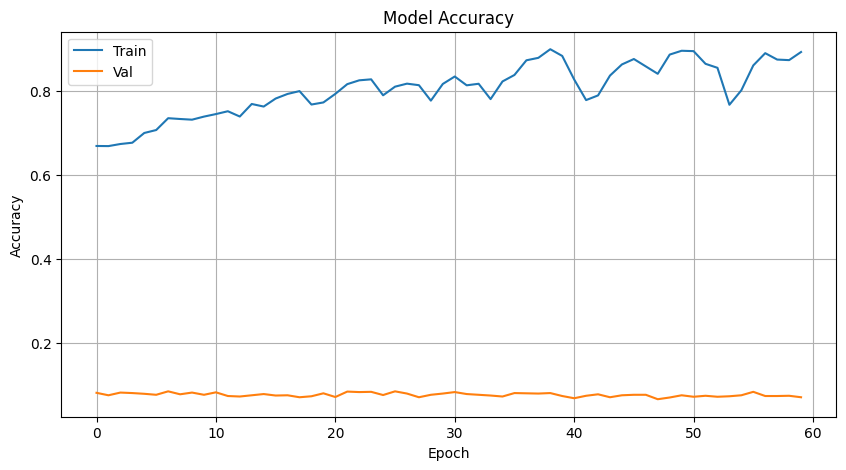

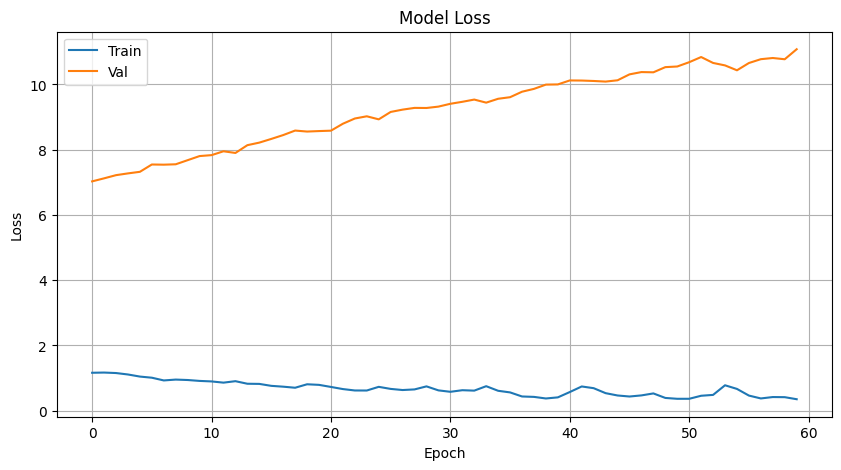

In [39]:
import matplotlib

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=32, verbose=2)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid(True)
plt.show()


In [70]:
# Build the LSTM model
import tensorflow as tf

model3 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(114, activation='softmax')
])


model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()
model3.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 32, epochs=60, verbose=2)




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 130, 64)           19968     
                                                                 
 lstm_13 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 114)               7410      
                                                                 
Total params: 64562 (252.20 KB)
Trainable params: 64562 (252.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
214/2

Epoch 1/60
214/214 - 3s - loss: 2.9302 - accuracy: 0.2316 - val_loss: 4.5129 - val_accuracy: 0.0865 - 3s/epoch - 16ms/step
Epoch 2/60
214/214 - 3s - loss: 2.9271 - accuracy: 0.2344 - val_loss: 4.4483 - val_accuracy: 0.0895 - 3s/epoch - 14ms/step
Epoch 3/60
214/214 - 3s - loss: 2.9057 - accuracy: 0.2322 - val_loss: 4.5033 - val_accuracy: 0.0865 - 3s/epoch - 15ms/step
Epoch 4/60
214/214 - 4s - loss: 2.8935 - accuracy: 0.2316 - val_loss: 4.4820 - val_accuracy: 0.1018 - 4s/epoch - 20ms/step
Epoch 5/60
214/214 - 3s - loss: 2.8802 - accuracy: 0.2389 - val_loss: 4.4863 - val_accuracy: 0.0854 - 3s/epoch - 14ms/step
Epoch 6/60
214/214 - 3s - loss: 2.8808 - accuracy: 0.2385 - val_loss: 4.5476 - val_accuracy: 0.0947 - 3s/epoch - 14ms/step
Epoch 7/60
214/214 - 3s - loss: 2.9209 - accuracy: 0.2303 - val_loss: 4.5057 - val_accuracy: 0.0953 - 3s/epoch - 14ms/step
Epoch 8/60
214/214 - 5s - loss: 2.8521 - accuracy: 0.2453 - val_loss: 4.6059 - val_accuracy: 0.0854 - 5s/epoch - 23ms/step
Epoch 9/60
214/2

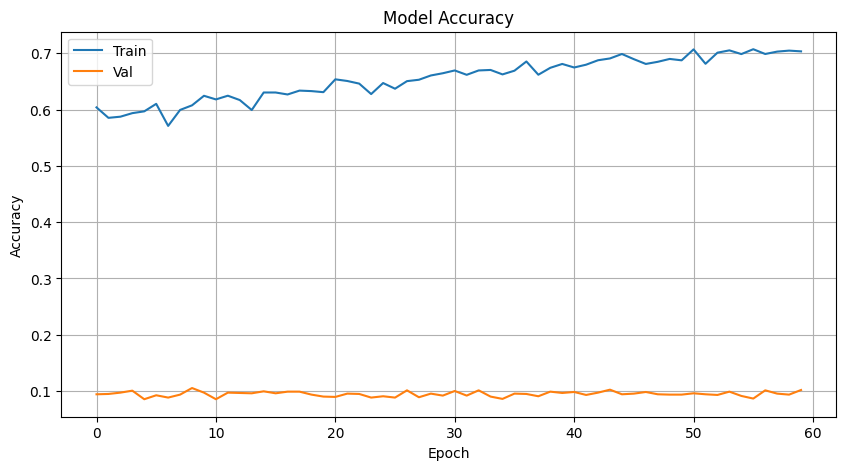

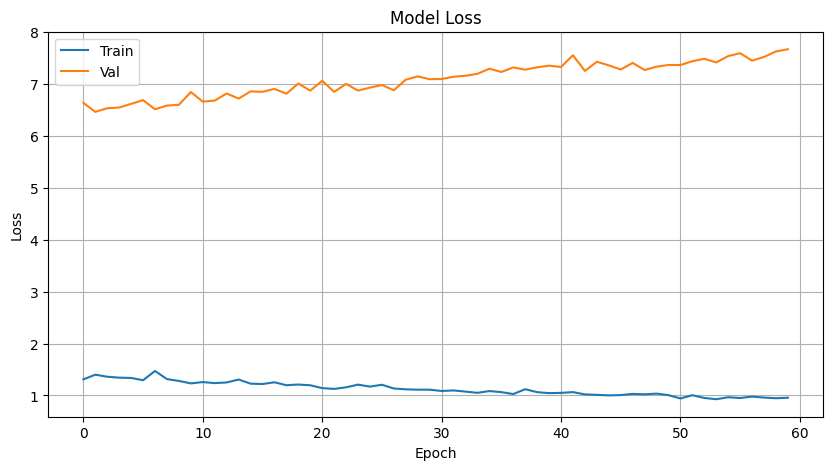

In [71]:
import matplotlib

history3 = model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=32, verbose=2)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid(True)
plt.show()

In [40]:
import tensorflow as tf

model2 = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(114, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
214/214 [==============================] - 19s 37ms/step - loss: 4.7074 - accuracy: 0.0215 - val_loss: 4.4870 - val_accuracy: 0.0269
Epoch 2/50
214/214 [==============================] - 8s 36ms/step - loss: 4.4188 - accuracy: 0.0364 - val_loss: 4.2946 - val_accuracy: 0.0538
Epoch 3/50
214/214 [==============================] - 6s 29ms/step - loss: 4.2431 - accuracy: 0.0544 - val_loss: 4.1983 - val_accuracy: 0.0649
Epoch 4/50
214/214 [==============================] - 7s 33ms/step - loss: 4.1085 - accuracy: 0.0665 - val_loss: 4.1231 - val_accuracy: 0.0643
Epoch 5/50
214/214 [==============================] - 6s 29ms/step - loss: 4.0154 - accuracy: 0.0765 - val_loss: 4.0941 - val_accuracy: 0.0766
Epoch 6/50
214/214 [==============================] - 7s 33ms/step - loss: 3.9320 - accuracy: 0.0901 - val_loss: 4.0371 - val_accuracy: 0.0708
Epoch 7/50
214/214 [==============================] - 6s 28ms/step - loss: 3.8788 - accuracy: 0.0940 - val_loss: 4.0665 - val_accuracy: 0.077

Epoch 1/60
214/214 - 6s - loss: 1.3101 - accuracy: 0.6039 - val_loss: 6.6414 - val_accuracy: 0.0942 - 6s/epoch - 29ms/step
Epoch 2/60
214/214 - 5s - loss: 1.3997 - accuracy: 0.5854 - val_loss: 6.4673 - val_accuracy: 0.0947 - 5s/epoch - 25ms/step
Epoch 3/60
214/214 - 6s - loss: 1.3606 - accuracy: 0.5874 - val_loss: 6.5373 - val_accuracy: 0.0971 - 6s/epoch - 30ms/step
Epoch 4/60
214/214 - 5s - loss: 1.3424 - accuracy: 0.5937 - val_loss: 6.5505 - val_accuracy: 0.1006 - 5s/epoch - 25ms/step
Epoch 5/60
214/214 - 6s - loss: 1.3369 - accuracy: 0.5969 - val_loss: 6.6215 - val_accuracy: 0.0854 - 6s/epoch - 29ms/step
Epoch 6/60
214/214 - 5s - loss: 1.2933 - accuracy: 0.6102 - val_loss: 6.6935 - val_accuracy: 0.0924 - 5s/epoch - 25ms/step
Epoch 7/60
214/214 - 7s - loss: 1.4712 - accuracy: 0.5711 - val_loss: 6.5171 - val_accuracy: 0.0883 - 7s/epoch - 30ms/step
Epoch 8/60
214/214 - 6s - loss: 1.3152 - accuracy: 0.5994 - val_loss: 6.5889 - val_accuracy: 0.0936 - 6s/epoch - 26ms/step
Epoch 9/60
214/2

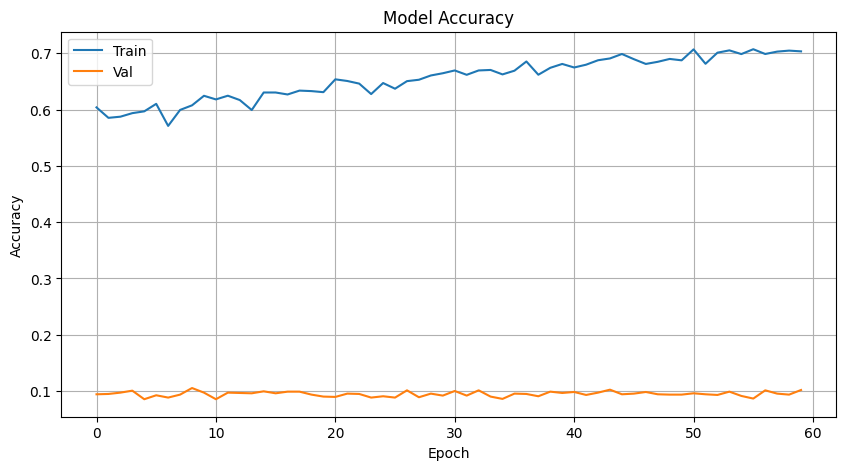

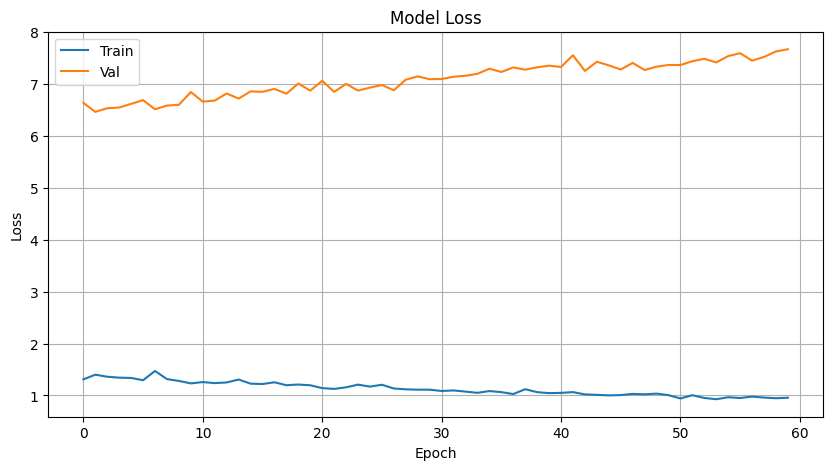

In [45]:
import matplotlib

history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=32, verbose=2)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid(True)
plt.show()


In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
metadata_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'instrumentalness', 'valence', 'tempo', 'time_signature']

# Scale the metadata features
scaler = StandardScaler()
# Encode Track genre features
encoder = OneHotEncoder(sparse=False)

numeric_features = merged_df[['popularity', 'duration_ms', 'energy', 'instrumentalness', 'valence', 'tempo', 'time_signature']]
numeric_features_scaled = scaler.fit_transform(numeric_features)

track_genre_encoded = encoder.fit_transform(merged_df[['track_genre']])



features_combined = np.hstack((numeric_features_scaled, track_genre_encoded))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
metadata_features = ['popularity', 'duration_ms', 'energy', 'instrumentalness', 'valence', 'tempo', 'time_signature']
scaler = StandardScaler()
merged_df[metadata_features] = scaler.fit_transform(merged_df[metadata_features])

In [48]:
from sklearn.preprocessing import MinMaxScaler

# Extract the 'danceability' column as a numpy array, reshaping it to (-1, 1) because it is a single feature
danceability = merged_df['danceability'].values.reshape(-1, 1)

# Initialize the MinMaxScaler to scale between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform it
danceability_scaled = scaler.fit_transform(danceability)


merged_df['danceability'] = danceability_scaled


In [49]:
from sklearn.model_selection import train_test_split

X = features_combined
y = merged_df['danceability']  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [50]:
print("Current shape of X:", X.shape)
# Reshape X to have one timestep per sample
if len(X.shape) == 2:  # Only if X is two-dimensional
    X = X.reshape((X.shape[0], 1, X.shape[1]))
print("New shape of X for LSTM:", X.shape)


Current shape of X: (11400, 121)
New shape of X for LSTM: (11400, 1, 121)


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model4 = Sequential([
    Flatten(input_shape=(1, 121)),
    Dense(1, activation='sigmoid')
])

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
285/285 [==============================] - 2s 4ms/step - loss: 0.0190 - mae: 0.1096 - val_loss: 0.0143 - val_mae: 0.0940
Epoch 2/50
285/285 [==============================] - 1s 3ms/step - loss: 0.0127 - mae: 0.0895 - val_loss: 0.0129 - val_mae: 0.0894
Epoch 3/50
285/285 [==============================] - 1s 3ms/step - loss: 0.0118 - mae: 0.0858 - val_loss: 0.0127 - val_mae: 0.0878
Epoch 4/50
285/285 [==============================] - 1s 3ms/step - loss: 0.0114 - mae: 0.0843 - val_loss: 0.0126 - val_mae: 0.0882
Epoch 5/50
285/285 [==============================] - 1s 3ms/step - loss: 0.0111 - mae: 0.0832 - val_loss: 0.0124 - val_mae: 0.0871
Epoch 6/50
285/285 [==============================] - 1s 3ms/step - loss: 0.0109 - mae: 0.0822 - val_loss: 0.0123 - val_mae: 0.0871
Epoch 7/50
285/285 [==============================] - 1s 3ms/step - loss: 0.0106 - mae: 0.0812 - val_loss: 0.0123 - val_mae: 0.0869
Epoch 8/50
285/285 [==============================] - 1s 4ms/step - loss: 0.

In [78]:
# Evaluate the model
eval_result = model4.evaluate(X_val, y_val)
print(f"Loss: {eval_result[0]}, MAE: {eval_result[1]}")

72/72 [==============================] - 0s 2ms/step - loss: 0.0138 - mae: 0.0914
Loss: 0.013758535496890545, MAE: 0.09135513007640839


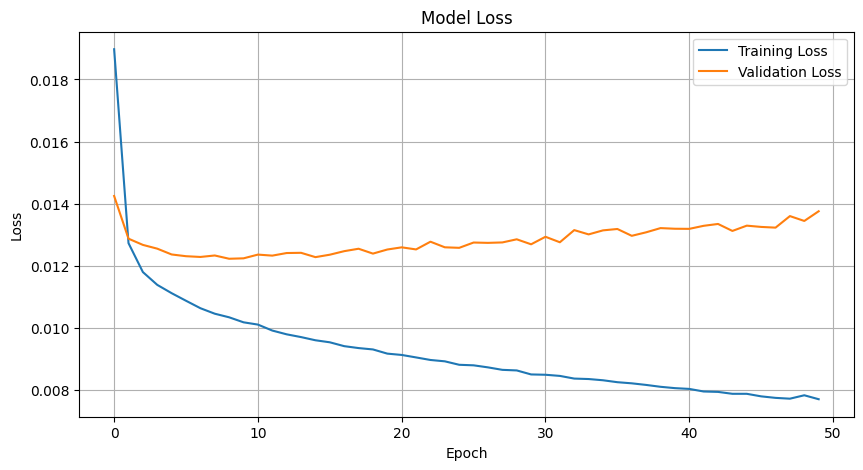

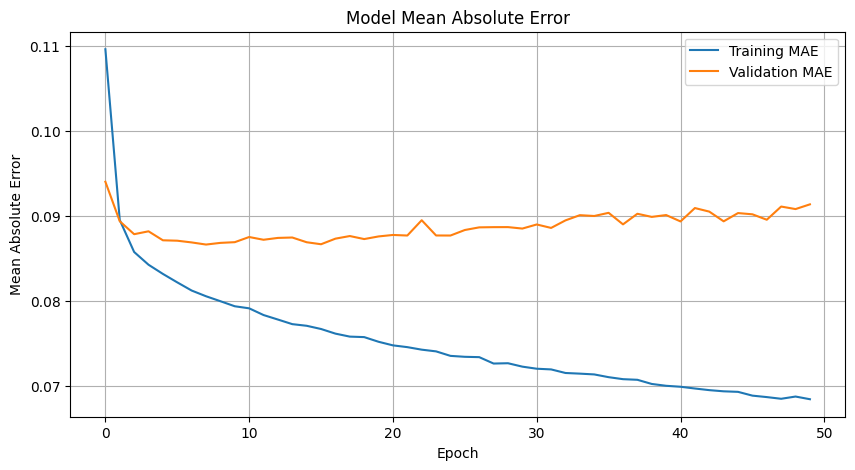

In [81]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot Mean Absolute Error
plt.figure(figsize=(10, 5))
plt.plot(history4.history['mae'], label='Training MAE')
plt.plot(history4.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
